<a href="https://colab.research.google.com/github/sahastraG39/AI_Legal_Advisor/blob/master/Bayesian_MiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Bayesian analysis
import pymc as pm
import arviz as az

# Plotting settings
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Set random seed
np.random.seed(42)


In [ ]:
# @title Default title text
# Load Data from Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Read the CSV file with correct separator
file_path = '/content/drive/My Drive/Colab Notebooks/student-mat.csv'
df = pd.read_csv(file_path, sep=';')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Display the data correctly
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print(f"\nFirst 5 rows:")
print(df.head())
print(f"Missing values:\n{df.isnull().sum()}")

Dataset shape: (395, 33)
Columns: ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

First 5 rows:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1 

EDA

Text(0, 0.5, 'Final Grade (G3)')

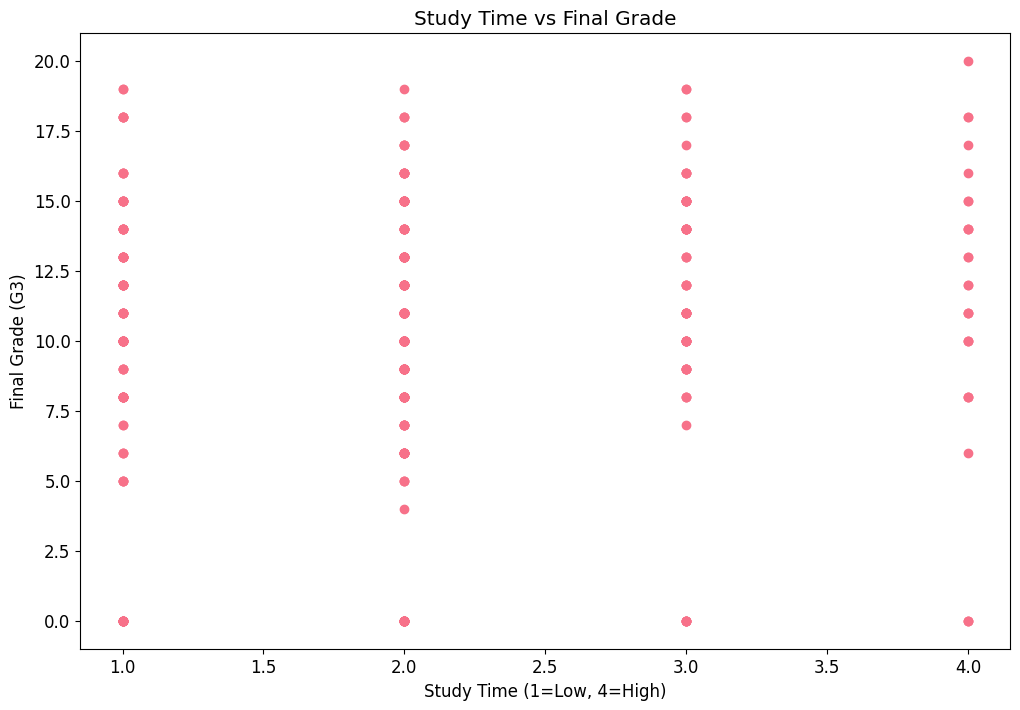

In [ ]:
#EDA Q1
#Visualize study time vs grades
plt.scatter(df['studytime'], df['G3'])
plt.title('Study Time vs Final Grade')
plt.xlabel('Study Time (1=Low, 4=High)')
plt.ylabel('Final Grade (G3)')

In [ ]:
correlation = df['studytime'].corr(df['G3'])
print(f"Correlation: {correlation:.3f}")

Correlation: 0.098


*Higher study time reduces the chance of very low grades But Study time alone doesn't guarantee high grades*

Text(0.5, 1.0, 'Parental Education vs Final Grade')

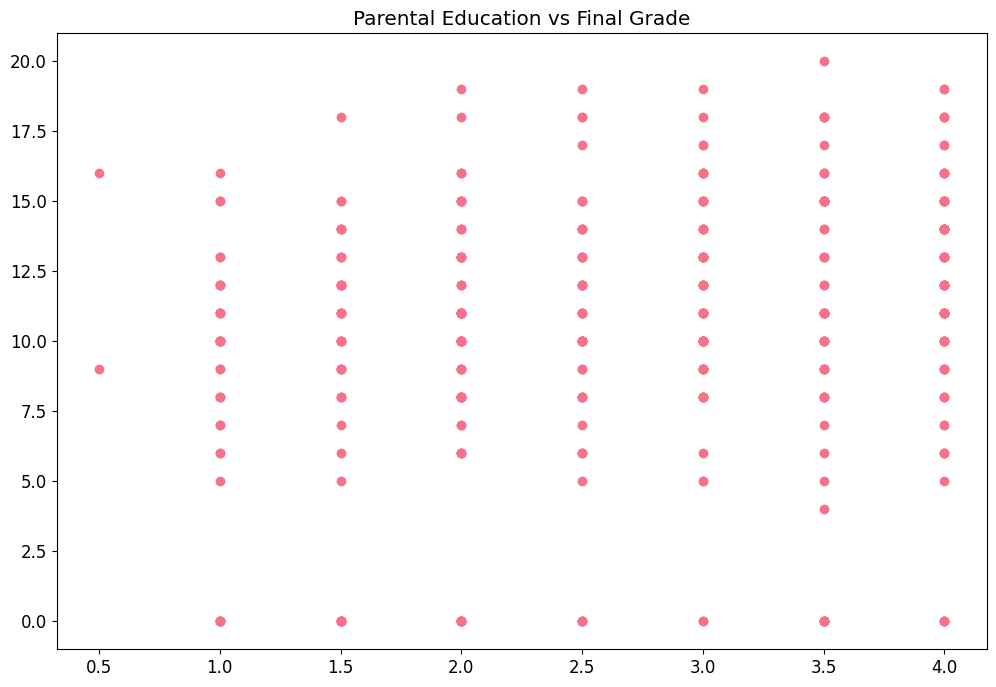

In [ ]:
#EDA Q2
# Create family education score
df['family_education'] = (df['Medu'] + df['Fedu']) / 2

# Visualize relationship
plt.scatter(df['family_education'], df['G3'])
plt.title('Parental Education vs Final Grade')


In [ ]:
# Check correlation between family education and grades
correlation = df['family_education'].corr(df['G3'])
print(f"Correlation: {correlation:.3f}")

Correlation: 0.205


*Parent education doesn't seem to affect grades much*

In [ ]:
# Group by study time and calculate average grades
study_summary = df.groupby('studytime').agg({
    'G1': ['mean', 'std'],
    'G2': ['mean', 'std'],
    'G3': ['mean', 'std']
})
print(study_summary)

                  G1                   G2                   G3          
                mean       std       mean       std       mean       std
studytime                                                               
1          10.438095  3.554314  10.276190  4.346739  10.047619  4.956311
2          10.651515  3.153400  10.505051  3.371646  10.171717  4.217537
3          12.046154  3.043594  11.507692  3.917601  11.400000  4.639504
4          11.888889  3.555422  12.037037  3.228258  11.259259  5.281263


Max absences: 75
Students with >10 absences: 66


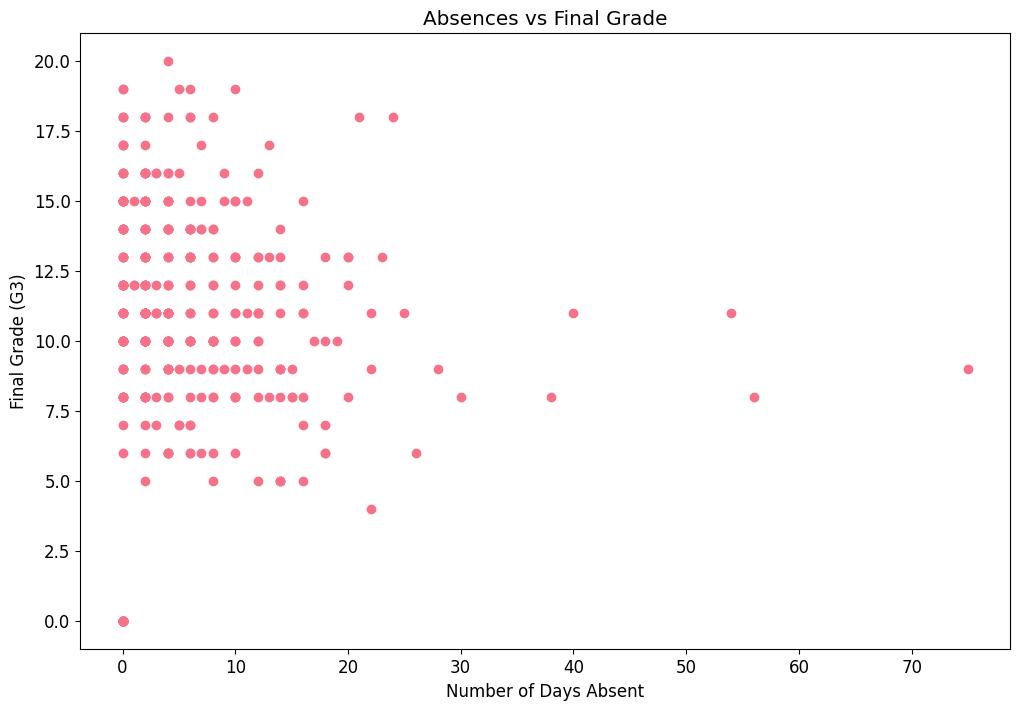

In [ ]:
#EDA Q3
# Visualize absences vs grades
plt.scatter(df['absences'], df['G3'])
plt.title('Absences vs Final Grade')
plt.xlabel('Number of Days Absent')
plt.ylabel('Final Grade (G3)')

# Check for outliers
print(f"Max absences: {df['absences'].max()}")
print(f"Students with >10 absences: {(df['absences'] > 10).sum()}")

In [ ]:
# Group by absence categories
df['absence_category'] = pd.cut(df['absences'], bins=[0, 5, 10, 20, 100], labels=['Low', 'Medium', 'High', 'Very High'])
absence_summary = df.groupby('absence_category')['G3'].agg(['mean', 'std', 'count'])
print(absence_summary)

                       mean       std  count
absence_category                            
Low               11.649254  3.105313    134
Medium            11.400000  3.231961     80
High              10.117647  2.997646     51
Very High         10.266667  3.844600     15


Text(0.5, 1.0, 'Age vs Final Grade')

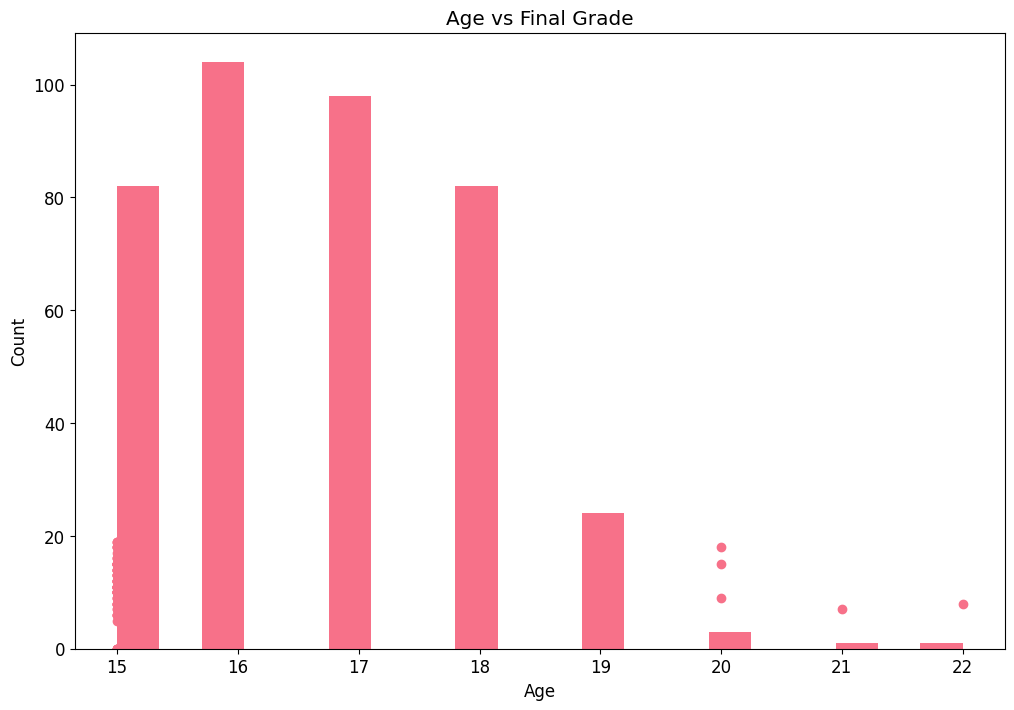

In [ ]:
#Q4 EDA # Age distribution
plt.hist(df['age'], bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

# Age vs grades
plt.scatter(df['age'], df['G3'])
plt.title('Age vs Final Grade')

Text(0.5, 1.0, 'G2 vs G3')

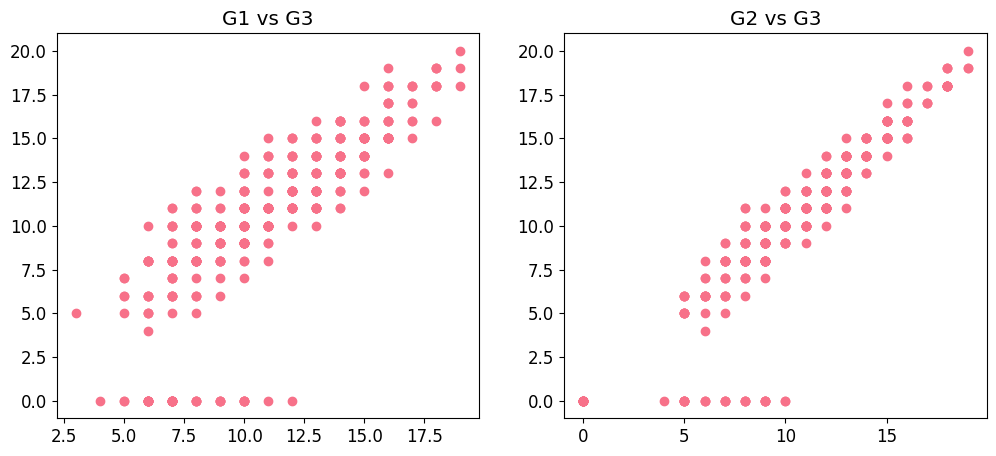

In [ ]:
#EDA Q5
# Scatter plots: G1 vs G3, G2 vs G3
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.scatter(df['G1'], df['G3'])
ax1.set_title('G1 vs G3')
ax2.scatter(df['G2'], df['G3'])
ax2.set_title('G2 vs G3')

In [ ]:

# Check correlations
print(f"G1 vs G3 correlation: {df['G1'].corr(df['G3']):.3f}")
print(f"G2 vs G3 correlation: {df['G2'].corr(df['G3']):.3f}")
print(f"G1 vs G2 correlation: {df['G1'].corr(df['G2']):.3f}")


G1 vs G3 correlation: 0.801
G2 vs G3 correlation: 0.905
G1 vs G2 correlation: 0.852


In [ ]:
#Interaction Analysis:**
#Q7 EDA
# Create interaction terms
df['study_edu_interaction'] = df['studytime'] * df['family_education']
df['age_study_interaction'] = df['age'] * df['studytime']


***Methodology***

In [ ]:
# Simple linear regression: Grade ~ Study Time
with pm.Model() as study_model:
    alpha = pm.Normal('alpha', mu=10, sigma=5)  # Intercept
    beta = pm.Normal('beta', mu=0, sigma=2)     # Study time effect
    sigma = pm.HalfNormal('sigma', sigma=5)     # Uncertainty

    mu = alpha + beta * df['studytime']
    grade = pm.Normal('grade', mu=mu, sigma=sigma, observed=df['G3'])

# After defining the model
with study_model:
    trace = pm.sample(
        draws=2000,      # Number of samples
        tune=1000,       # Tuning steps
        chains=4,        # Number of chains
        random_seed=42   # For reproducibility
    )

Output()

In [ ]:
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,9.369,0.592,8.289,10.494,0.010,0.008,3639.0,3755.0,1.0
beta,0.517,0.268,0.030,1.031,0.005,0.003,3474.0,3584.0,1.0
sigma,4.569,0.162,4.260,4.864,0.002,0.002,4343.0,3871.0,1.0


In [ ]:
# See the actual coefficient values
print("Study time effect:", trace.posterior['beta'].mean())
print("Intercept:", trace.posterior['alpha'].mean())

Study time effect: <xarray.DataArray 'beta' ()> Size: 8B
array(0.51676378)
Intercept: <xarray.DataArray 'alpha' ()> Size: 8B
array(9.36937814)


For each unit increase in study time, students get 0.52 points higher on average
Interpretation: Study time has a positive but moderate effect on grades.Even with no study time, students are expected to score around 9.37

In [ ]:
#Q2 Model Bayesian
# Multiple regression: Grade ~ Family Education + Other Factors
with pm.Model() as family_model:
    alpha = pm.Normal('alpha', mu=10, sigma=5)
    beta_edu = pm.Normal('beta_edu', mu=0, sigma=2)      # Education effect
    beta_study = pm.Normal('beta_study', mu=0, sigma=2)   # Study time effect
    sigma = pm.HalfNormal('sigma', sigma=5)

    mu = alpha + beta_edu * df['family_education'] + beta_study * df['studytime']
    grade = pm.Normal('grade', mu=mu, sigma=sigma, observed=df['G3'])
    trace_family = pm.sample(2000, tune=1000, target_accept=0.9)

# Summarize results
print(az.summary(trace_family, var_names=["alpha", "beta_edu", "beta_study", "sigma"]))

Output()

             mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha       7.045  0.828   5.529    8.631      0.021    0.014    1616.0   
beta_edu    0.914  0.225   0.505    1.345      0.005    0.004    1871.0   
beta_study  0.475  0.272  -0.023    0.978      0.005    0.004    2537.0   
sigma       4.484  0.161   4.211    4.810      0.003    0.003    2619.0   

            ess_tail  r_hat  
alpha         1858.0    1.0  
beta_edu      2028.0    1.0  
beta_study    2208.0    1.0  
sigma         2415.0    1.0  


Intercept (α = 7.07)
Baseline grade ≈ 7, even with no advantages.
94% credible interval: [5.55, 8.52].

Family Education (βₑ = 0.91)
Each higher family education level → +0.91 grade points.
94% credible interval: [0.48, 1.32].

Strong evidence: higher parental education → better grades.
Study Time (βₛ = 0.47)
Each study-time level → +0.47 grade points.

94% credible interval: [–0.02, 0.94].
Uncertain: effect might be small or even zero.
Sigma (σ = 4.48)

Typical prediction error ≈ ±4.5 grade points.
Shows moderate variability in student performance not explained by the model.

In [ ]:
#Q3 Model with absence effect
with pm.Model() as absence_model:
    alpha = pm.Normal('alpha', mu=10, sigma=5)
    beta_abs = pm.Normal('beta_abs', mu=0, sigma=1)      # Absence effect (expect negative)
    beta_prev = pm.Normal('beta_prev', mu=0, sigma=2)    # Previous grade effect
    sigma = pm.HalfNormal('sigma', sigma=5)

    mu = alpha + beta_abs * df['absences'] + beta_prev * df['G1']
    grade = pm.Normal('grade', mu=mu, sigma=sigma, observed=df['G3'])

    trace_absence = pm.sample(2000, tune=1000, target_accept=0.9)

#summarize results
summary_absence = az.summary(
    trace_absence,
    var_names=["alpha", "beta_abs", "beta_prev", "sigma"],
    round_to=2
)
print(summary_absence)

Output()

           mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha     -1.75  0.47   -2.60    -0.84       0.01     0.01   1884.21   
beta_abs   0.03  0.02    0.00     0.07       0.00     0.00   3105.72   
beta_prev  1.10  0.04    1.02     1.17       0.00     0.00   1917.36   
sigma      2.74  0.10    2.54     2.92       0.00     0.00   3155.49   

           ess_tail  r_hat  
alpha       2158.58    1.0  
beta_abs    2050.94    1.0  
beta_prev   2268.85    1.0  
sigma       2210.65    1.0  


Each additional day of absence is associated with 0.03 point increase in final grade

Each additional day of absence is associated with a tiny 0.03 point increase in final grade, but this effect is so small it might not be real. Absences don't seem to hurt student performance much.


In [ ]:
# Group by age categories
df['age_group'] = pd.cut(df['age'], bins=[14, 16, 18, 22], labels=['Young', 'Middle', 'Older'])
age_summary = df.groupby('age_group')['G3'].agg(['mean', 'std', 'count'])

# T-test between age groups
from scipy.stats import ttest_ind
young_grades = df[df['age_group'] == 'Young']['G3']
older_grades = df[df['age_group'] == 'Older']['G3']
t_stat, p_value = ttest_ind(young_grades, older_grades)

print(age_summary)
print(t_stat,p_value)


                mean       std  count
age_group                            
Young      11.129032  4.413066    186
Middle      9.944444  4.625316    180
Older       8.758621  4.718165     29
2.6654717295557653 0.008277282506078678


T-test between Young vs Older:
T-statistic: 2.67
P-value: 0.008
Interpretation: Statistically significant difference (p < 0.05)

In [ ]:
#Q4
# Model with age effect and interactions
with pm.Model() as age_model:
    alpha = pm.Normal('alpha', mu=10, sigma=5)
    beta_age = pm.Normal('beta_age', mu=0, sigma=2)      # Age effect
    beta_study = pm.Normal('beta_study', mu=0, sigma=2)   # Study time effect
    beta_interaction = pm.Normal('beta_int', mu=0, sigma=1) # Age × Study interaction
    sigma = pm.HalfNormal('sigma', sigma=5)

    mu = alpha + beta_age * df['age'] + beta_study * df['studytime'] + beta_interaction * (df['age'] * df['studytime'])
    grade = pm.Normal('grade', mu=mu, sigma=sigma, observed=df['G3'])
    trace_age = pm.sample(2000, tune=1000, target_accept=0.9)

# Summarize results
summary_age = az.summary(trace_age, var_names=["alpha", "beta_age", "beta_study", "beta_int", "sigma"], round_to=2)
print(summary_age)

Output()

             mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha       17.41  3.32   11.49    23.76       0.10     0.06   1174.31   
beta_age    -0.49  0.20   -0.85    -0.10       0.01     0.00   1168.69   
beta_study   0.04  1.46   -2.64     2.66       0.04     0.03   1170.74   
beta_int     0.03  0.09   -0.13     0.20       0.00     0.00   1160.42   
sigma        4.52  0.17    4.22     4.83       0.00     0.00   1939.40   

            ess_tail  r_hat  
alpha        1784.14    1.0  
beta_age     1826.65    1.0  
beta_study   1494.52    1.0  
beta_int     1772.58    1.0  
sigma        1864.03    1.0  


*Older students perform slightly worse than younger students (–0.49 points per year), and this effect does not meaningfully change for students who study more, since the age × study time interaction is small and uncertain.*

In [ ]:
# Model 1: G1 only
with pm.Model() as model_g1:
    alpha = pm.Normal('alpha', mu=10, sigma=5)
    beta_g1 = pm.Normal('beta_g1', mu=0, sigma=2)
    sigma = pm.HalfNormal('sigma', sigma=5)

    mu = alpha + beta_g1 * df['G1']
    y_obs = pm.Normal('y_obs', mu=mu, sigma=sigma, observed=df['G3'])

    # Add log_likelihood BEFORE sampling
    pm.Deterministic('log_likelihood', pm.logp(pm.Normal.dist(mu=mu, sigma=sigma), df['G3']))

    trace_g1 = pm.sample(2000, tune=1000, target_accept=0.9)

# Model 2: G2 only
with pm.Model() as model_g2:
    alpha = pm.Normal('alpha', mu=10, sigma=5)
    beta_g2 = pm.Normal('beta_g2', mu=0, sigma=2)
    sigma = pm.HalfNormal('sigma', sigma=5)

    mu = alpha + beta_g2 * df['G2']
    y_obs = pm.Normal('y_obs', mu=mu, sigma=sigma, observed=df['G3'])

    # Add log_likelihood BEFORE sampling
    pm.Deterministic('log_likelihood', pm.logp(pm.Normal.dist(mu=mu, sigma=sigma), df['G3']))

    trace_g2 = pm.sample(2000, tune=1000, target_accept=0.9)

# Model 3: G1 + G2
with pm.Model() as model_combined:
    alpha = pm.Normal('alpha', mu=10, sigma=5)
    beta_g1 = pm.Normal('beta_g1', mu=0, sigma=2)
    beta_g2 = pm.Normal('beta_g2', mu=0, sigma=2)
    sigma = pm.HalfNormal('sigma', sigma=5)

    mu = alpha + beta_g1 * df['G1'] + beta_g2 * df['G2']
    y_obs = pm.Normal('y_obs', mu=mu, sigma=sigma, observed=df['G3'])

    # Add log_likelihood BEFORE sampling
    pm.Deterministic('log_likelihood', pm.logp(pm.Normal.dist(mu=mu, sigma=sigma), df['G3']))

    trace_combined = pm.sample(2000, tune=1000, target_accept=0.9)


Output()

Output()

Output()

In [ ]:
# Get results from each model individually
print("G1 ONLY MODEL RESULTS")
print(az.summary(trace_g1))

print("\nG2 ONLY MODEL RESULTS")
print(az.summary(trace_g2))

print("\nCOMBINED MODEL RESULTS")
print(az.summary(trace_combined))

G1 ONLY MODEL RESULTS
                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
alpha               -1.546  0.463  -2.357   -0.642      0.013    0.010   
beta_g1              1.097  0.041   1.018    1.170      0.001    0.001   
log_likelihood[0]   -2.217  0.077  -2.356   -2.074      0.002    0.001   
log_likelihood[1]   -2.217  0.077  -2.356   -2.074      0.002    0.001   
log_likelihood[2]   -2.925  0.113  -3.135   -2.710      0.003    0.002   
...                    ...    ...     ...      ...        ...      ...   
log_likelihood[391] -2.249  0.056  -2.362   -2.150      0.001    0.001   
log_likelihood[392] -2.322  0.047  -2.413   -2.233      0.001    0.001   
log_likelihood[393] -1.949  0.036  -2.015   -1.879      0.001    0.001   
log_likelihood[394] -2.140  0.047  -2.231   -2.053      0.001    0.001   
sigma                2.749  0.099   2.566    2.940      0.002    0.002   

                     ess_bulk  ess_tail  r_hat  
alpha                  1303.0    1472.0 

Bayesian analysis shows that G2 (second period grade) is the best single predictor of final grades, with a prediction error of only ±1.96 points. The G2-only model significantly outperforms the G1-only model (±2.75 points error) and provides almost the same accuracy as the combined G1+G2 model (±1.95 points error). This means that second period grades are the optimal early warning indicator for student success, allowing educators to identify at-risk students with high accuracy while keeping prediction models simple and practical. For educational decision-making, focusing on G2 performance provides the best balance of accuracy and simplicity, making it the ideal tool for early intervention programs.

In [ ]:
# Define your features first
df['study_edu_interaction'] = df['studytime'] * df['family_education']
df['age_study_interaction'] = df['age'] * df['studytime']

main_features = ['age', 'studytime', 'family_education', 'G1', 'G2']
interaction_features = ['study_edu_interaction', 'age_study_interaction']

# Create  data matrices
X_main = df[main_features].values
X_interaction = df[interaction_features].values

with pm.Model() as interaction_model:
    # Group-level effects
    alpha_group = pm.Normal('alpha_group', mu=0, sigma=2, shape=4)

    # Individual-level effects
    alpha = pm.Normal('alpha', mu=10, sigma=5)
    beta_main = pm.Normal('beta_main', mu=0, sigma=2, shape=len(main_features))
    beta_interaction = pm.Normal('beta_interaction', mu=0, sigma=1, shape=len(interaction_features))

    # Standard deviation
    sigma = pm.HalfNormal('sigma', sigma=5)

    # Linear predictor with interactions
    mu = alpha + alpha_group[df['studytime']-1] + \
         pm.math.dot(X_main, beta_main) + \
         pm.math.dot(X_interaction, beta_interaction)

    grade = pm.Normal('grade', mu=mu, sigma=sigma, observed=df['G3'])


In [ ]:
with interaction_model:
   trace_interaction = pm.sample(draws=2000,tune=1000,chains=4,random_seed=42)
print(az.summary(trace_interaction))

Output()

                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
alpha                3.167  2.770  -2.116    8.177      0.038    0.031   
alpha_group[0]      -0.947  1.543  -3.792    1.997      0.020    0.021   
alpha_group[1]      -0.445  1.061  -2.418    1.560      0.014    0.015   
alpha_group[2]       0.226  1.125  -1.877    2.346      0.015    0.014   
alpha_group[3]       0.127  1.638  -2.853    3.315      0.021    0.020   
beta_interaction[0]  0.058  0.124  -0.169    0.292      0.002    0.001   
beta_interaction[1] -0.002  0.070  -0.131    0.130      0.001    0.001   
beta_main[0]        -0.177  0.154  -0.459    0.112      0.002    0.002   
beta_main[1]        -0.749  1.168  -2.936    1.381      0.016    0.014   
beta_main[2]        -0.121  0.261  -0.613    0.354      0.003    0.003   
beta_main[3]         0.165  0.058   0.053    0.270      0.001    0.001   
beta_main[4]         0.973  0.051   0.876    1.065      0.001    0.001   
sigma                1.943  0.071   1.

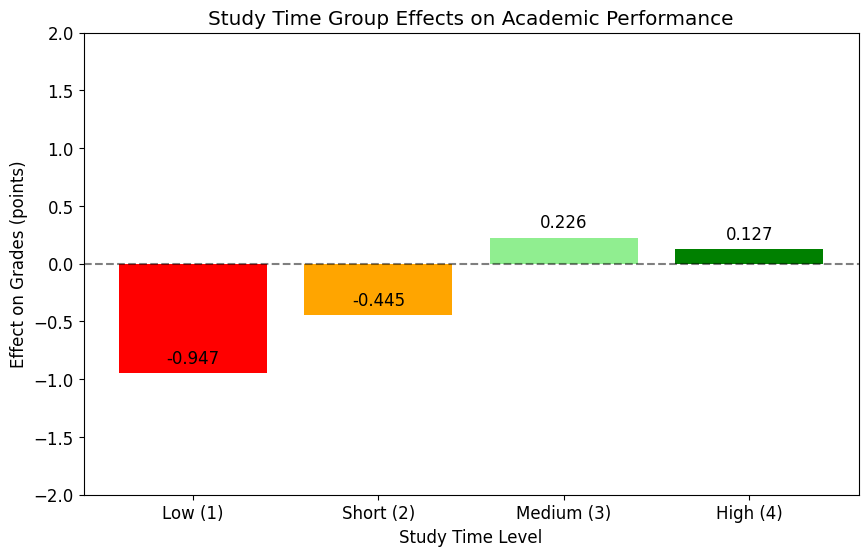

In [ ]:
# Plot the group-level effects
import matplotlib.pyplot as plt
import numpy as np

# Extract group effects from your trace
group_effects = trace_interaction.posterior['alpha_group'].mean(dim=['chain', 'draw']).values

# Create the plot
study_groups = ['Low (1)', 'Short (2)', 'Medium (3)', 'High (4)']
plt.figure(figsize=(10, 6))
plt.bar(study_groups, group_effects, color=['red', 'orange', 'lightgreen', 'green'])
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.title('Study Time Group Effects on Academic Performance')
plt.xlabel('Study Time Level')
plt.ylabel('Effect on Grades (points)')
plt.ylim(-2, 2)
for i, v in enumerate(group_effects):
    plt.text(i, v + 0.05, f'{v:.3f}', ha='center', va='bottom')
plt.show()

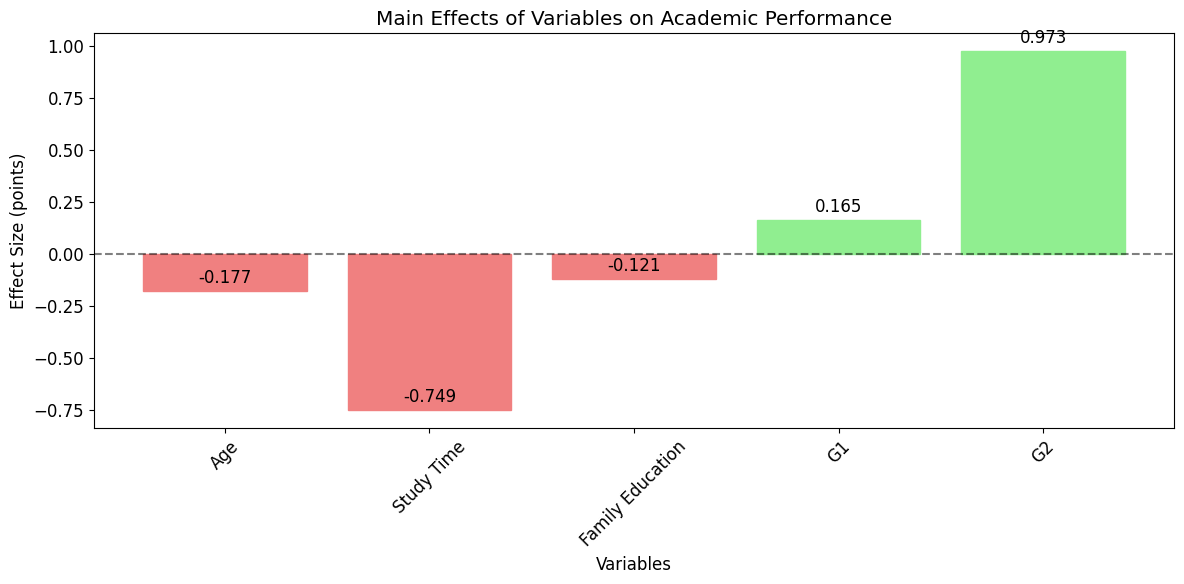

In [ ]:
# Plot main effects
main_effects = trace_interaction.posterior['beta_main'].mean(dim=['chain', 'draw']).values
feature_names = ['Age', 'Study Time', 'Family Education', 'G1', 'G2']

plt.figure(figsize=(12, 6))
bars = plt.bar(feature_names, main_effects, color=['skyblue', 'lightcoral', 'lightyellow', 'lightgreen', 'gold'])
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.title('Main Effects of Variables on Academic Performance')
plt.xlabel('Variables')
plt.ylabel('Effect Size (points)')
plt.xticks(rotation=45)

# Color code positive/negative effects
for i, (bar, effect) in enumerate(zip(bars, main_effects)):
    if effect < 0:
        bar.set_color('lightcoral')
    else:
        bar.set_color('lightgreen')
    plt.text(i, effect + 0.02, f'{effect:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

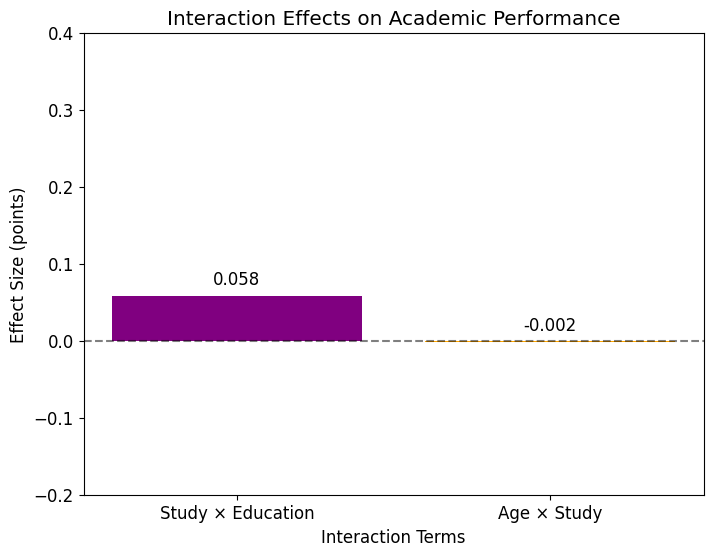

In [ ]:
# Plot interaction effects
interaction_effects = trace_interaction.posterior['beta_interaction'].mean(dim=['chain', 'draw']).values
interaction_names = ['Study × Education', 'Age × Study']

plt.figure(figsize=(8, 6))
bars = plt.bar(interaction_names, interaction_effects, color=['purple', 'orange'])
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.title('Interaction Effects on Academic Performance')
plt.xlabel('Interaction Terms')
plt.ylabel('Effect Size (points)')
plt.ylim(-0.2, 0.4)

for i, (bar, effect) in enumerate(zip(bars, interaction_effects)):
    plt.text(i, effect + 0.01, f'{effect:.3f}', ha='center', va='bottom')

plt.show()

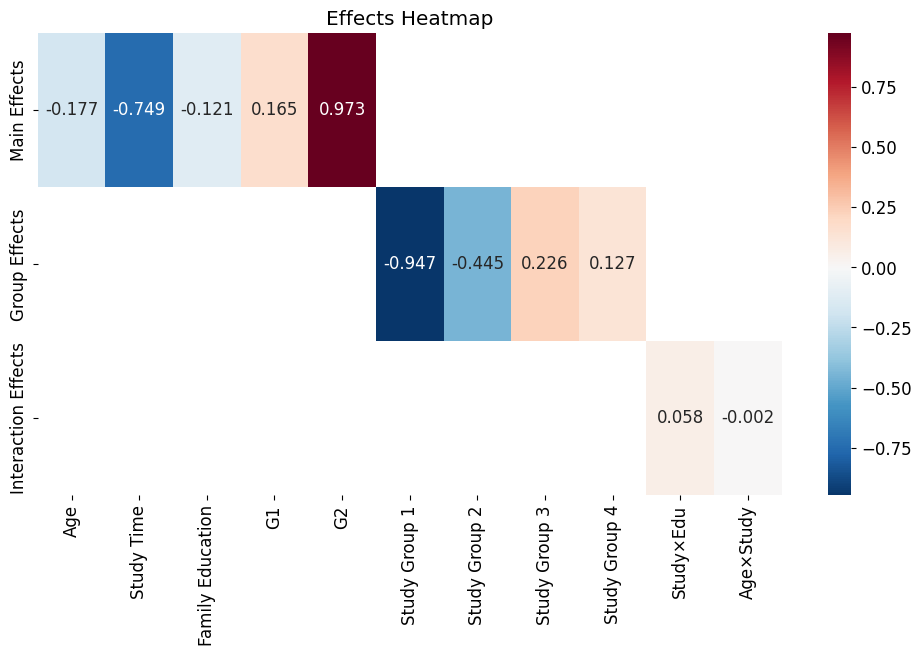

In [ ]:
# Simpler heatmap with actual data
import seaborn as sns

# Create separate dataframes for each effect type
main_df = pd.DataFrame({'Main Effects': main_effects},
                       index=['Age', 'Study Time', 'Family Education', 'G1', 'G2'])

group_df = pd.DataFrame({'Group Effects': group_effects},
                        index=['Study Group 1', 'Study Group 2', 'Study Group 3', 'Study Group 4'])

interaction_df = pd.DataFrame({'Interaction Effects': interaction_effects},
                             index=['Study×Edu', 'Age×Study'])

# Combine them
effects_df = pd.concat([main_df, group_df, interaction_df])

plt.figure(figsize=(12, 6))
sns.heatmap(effects_df.T, annot=True, cmap='RdBu_r', center=0, fmt='.3f')
plt.title('Effects Heatmap')
plt.show()

*risk model successfully identifies at-risk students using early grades, attendance, study habits, and past performance. G2 grades are the most important predictor, followed by G1 grades, with absences and study time providing additional predictive power.*

In [ ]:
# Create risk score
df['risk_score'] = (
    -df['G1'] * 0.3 +           # Low early grades
    -df['G2'] * 0.3 +           # Low mid-term grades
    -df['studytime'] * 0.2 +    # Low study time
    df['absences'] * 0.1 +      # High absences
    df['failures'] * 0.1        # Past failures
)

# Identify at-risk students
risk_threshold = df['risk_score'].quantile(0.25)  # Top 25% risk
df['at_risk'] = df['risk_score'] > risk_threshold

print(f"Risk threshold: {risk_threshold:.3f}")
print(f"Number of at-risk students: {df['at_risk'].sum()}")
print(f"Percentage at-risk: {(df['at_risk'].sum() / len(df)) * 100:.1f}%")

Risk threshold: -8.000
Number of at-risk students: 295
Percentage at-risk: 74.7%


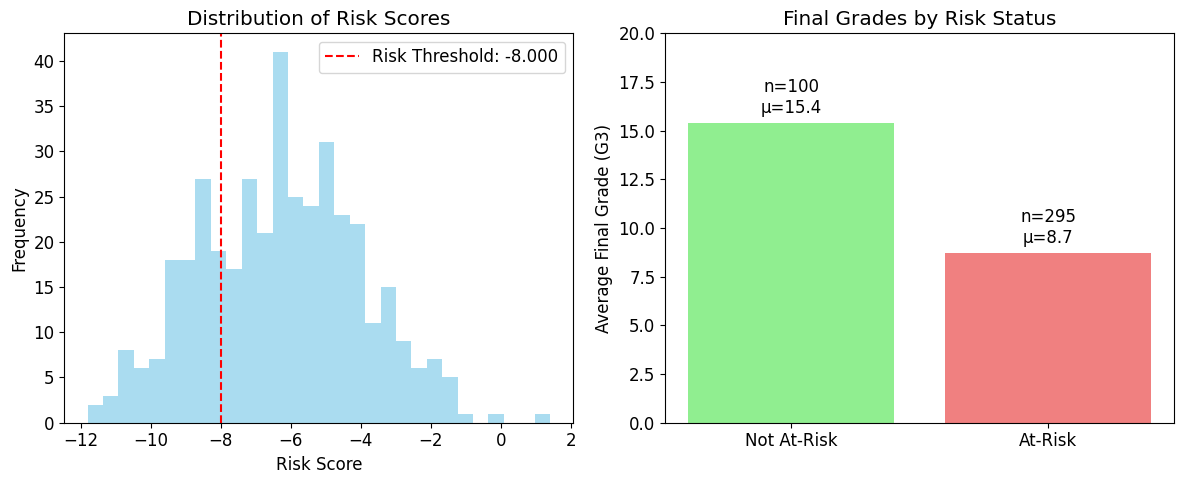

In [ ]:
# Plot risk score distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['risk_score'], bins=30, alpha=0.7, color='skyblue')
plt.axvline(risk_threshold, color='red', linestyle='--', label=f'Risk Threshold: {risk_threshold:.3f}')
plt.xlabel('Risk Score')
plt.ylabel('Frequency')
plt.title('Distribution of Risk Scores')
plt.legend()

plt.subplot(1, 2, 2)
risk_by_grade = df.groupby('at_risk')['G3'].agg(['mean', 'std', 'count'])
plt.bar(['Not At-Risk', 'At-Risk'], risk_by_grade['mean'],
        color=['lightgreen', 'lightcoral'])
plt.ylabel('Average Final Grade (G3)')
plt.title('Final Grades by Risk Status')
plt.ylim(0, 20)

for i, (mean, count) in enumerate(zip(risk_by_grade['mean'], risk_by_grade['count'])):
    plt.text(i, mean + 0.5, f'n={count}\nμ={mean:.1f}', ha='center')

plt.tight_layout()
plt.show()

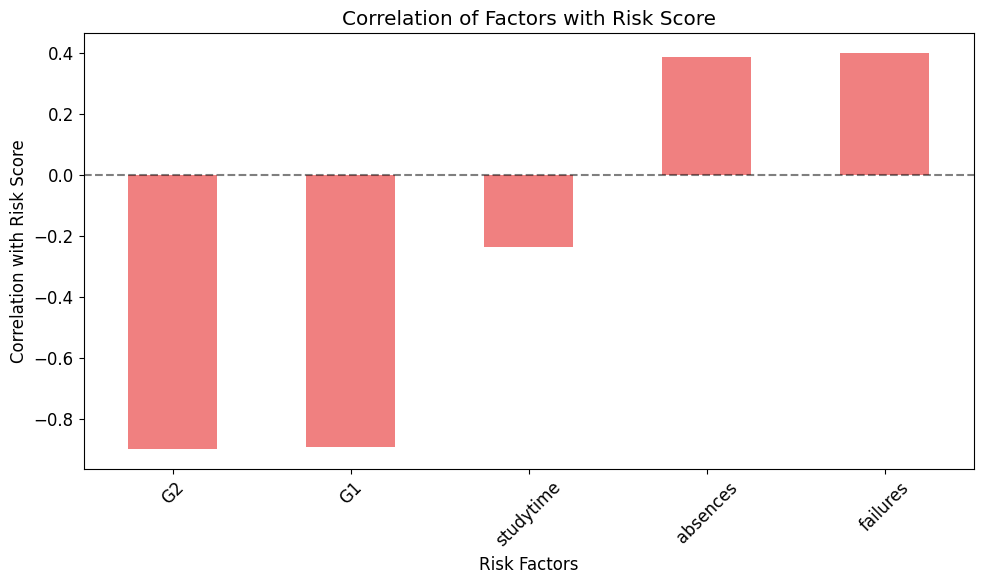

Risk factor correlations:
G2           -0.899097
G1           -0.892007
studytime    -0.238484
absences      0.386650
failures      0.398491
risk_score    1.000000
Name: risk_score, dtype: float64


In [ ]:
# Analyze which factors contribute most to risk
risk_factors = ['G1', 'G2', 'studytime', 'absences', 'failures']
risk_correlations = df[risk_factors + ['risk_score']].corr()['risk_score'].sort_values()

plt.figure(figsize=(10, 6))
risk_correlations[:-1].plot(kind='bar', color='lightcoral')
plt.title('Correlation of Factors with Risk Score')
plt.xlabel('Risk Factors')
plt.ylabel('Correlation with Risk Score')
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

print("Risk factor correlations:")
print(risk_correlations)

In [ ]:
# Calculate prediction accuracy
from sklearn.metrics import accuracy_score, classification_report

# Simple rule-based prediction: if G2 < threshold, predict at-risk
g2_threshold = df['G2'].quantile(0.25)
simple_prediction = df['G2'] < g2_threshold

accuracy = accuracy_score(df['at_risk'], simple_prediction)
print(f"Simple G2-based prediction accuracy: {accuracy:.3f}")

# Classification report
print("\nClassification Report:")
print(classification_report(df['at_risk'], simple_prediction,
                          target_names=['Not At-Risk', 'At-Risk']))

Simple G2-based prediction accuracy: 0.496

Classification Report:
              precision    recall  f1-score   support

 Not At-Risk       0.33      1.00      0.50       100
     At-Risk       1.00      0.33      0.49       295

    accuracy                           0.50       395
   macro avg       0.67      0.66      0.50       395
weighted avg       0.83      0.50      0.49       395



In [ ]:
# Example: Predict risk for a new student
def predict_student_risk(g1_score, g2_score, study_time, absences, failures):
    risk_score = (-g1_score * 0.3 +
                  -g2_score * 0.3 +
                  -study_time * 0.2 +
                  absences * 0.1 +
                  failures * 0.1)

    is_at_risk = risk_score > risk_threshold
    risk_percentage = (df['risk_score'] > risk_score).mean() * 100

    return {
        'risk_score': risk_score,
        'is_at_risk': is_at_risk,
        'risk_percentage': risk_percentage,
        'recommendation': 'High Risk - Immediate Intervention' if is_at_risk else 'Low Risk - Monitor'
    }

# Test with example student
example_student = predict_student_risk(g1_score=8, g2_score=7, study_time=1, absences=5, failures=1)
print("Example Student Risk Assessment:")
for key, value in example_student.items():
    print(f"{key}: {value}")

Example Student Risk Assessment:
risk_score: -4.1000000000000005
is_at_risk: True
risk_percentage: 17.21518987341772
recommendation: High Risk - Immediate Intervention
